In [237]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import scipy
import os
import control

SAVE_PATH = 'report/figs/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
plt.rcParams['figure.figsize'] = [4, 4]

In [238]:

# var 17
A = np.array([[0, 1], [-1, 7]])
b_0 = 8
B = np.array([[0], [b_0]])
C = np.zeros(A.shape[0])
C[0] += 1
t_p = 0.45
sigma_bar = 0.15

g = lambda t: np.cos(t) + 3 * np.sin(2 * t) + 5

# Task 1

Мирошник, с 177

In [239]:
t_p_1 = 2.9
omega_0 = t_p_1 / t_p

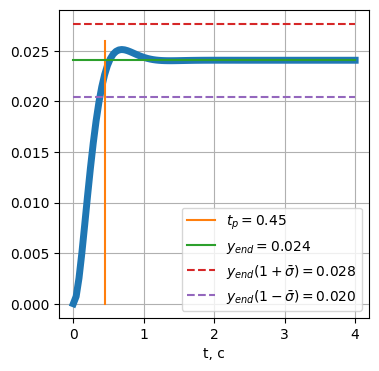

In [240]:
tf = scipy.signal.TransferFunction([1], [1, 1.41 * omega_0, omega_0**2]).to_ss()
ts = np.linspace(0, 4, 100)
t, y, _ = scipy.signal.lsim(tf, U = [1] * 100, T = ts )
end = y[-10:].mean()

plt.plot(t, y, linewidth=5)
plt.plot([t_p] * 100, np.linspace(0, 0.026, 100), label=f'$t_p = {t_p}$')
plt.plot(ts, [end.mean()] * 100, label=f'$y_{"{end}"} = {end: .3f}$')
plt.plot(ts, [end * (1 + sigma_bar)] * 100, label=f'$y_{"{end}"} (1 + \\bar \sigma) = {end * (1 + sigma_bar): .3f}$', linestyle='dashed')
plt.plot(ts, [end * (1 - sigma_bar)] * 100, label=f'$y_{"{end}"} (1 - \\bar \sigma) = {end * (1 - sigma_bar): .3f}$', linestyle='dashed')
plt.xlabel('t, c')

plt.legend()
plt.grid()
plt.savefig(SAVE_PATH + '1.png')

# Task 2

In [241]:
A_m, B_m, C_m, D_m = tf.to_ss().A, tf.to_ss().B, tf.to_ss().C, tf.to_ss().D
A_m, B_m, C_m, D_m = np.rot90(A_m, k=2), np.rot90(B_m, k=2), np.rot90(C_m, k=2), np.rot90(D_m, k=2)
A_m, A, B_m

(array([[  0.        ,   1.        ],
        [-41.5308642 ,  -9.08666667]]),
 array([[ 0,  1],
        [-1,  7]]),
 array([[0.],
        [1.]]))

In [242]:
theta = -((-A_m[-1, :] + A[-1, :]) / b_0).reshape(A.shape[0], 1)
kappa = b_0 / B_m[-1, 0] 
theta, kappa

(array([[-5.06635802],
        [-2.01083333]]),
 8.0)

In [243]:
def model(t, x, A, B, g):
    return A@x + (B * g(t)).reshape(A.shape[0])

t_span = [0, 20]
y0 = np.array([0, 0])
data_model= solve_ivp(model, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(A_m, B_m, g))

In [244]:
def system(t, x, A, B, theta, kappa, g):
    u = theta.T @ x + 1 / kappa * g(t)
    return A@x + (B * u).reshape(A.shape[0])

In [245]:
data_model.y.shape

(2, 1000)

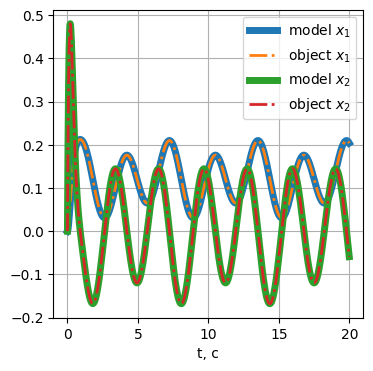

In [246]:
data = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(A, B, theta, kappa, g))
plt.plot(data.t, data_model.y[0, :], linewidth=5, label='model $x_1$')
plt.plot(data.t, data.y[0, :], '-.', linewidth=2, label='object $x_1$')
plt.plot(data.t, data_model.y[1, :], linewidth=5, label='model $x_2$')
plt.plot(data.t, data.y[1, :], '-.', linewidth=2, label='object $x_2$')
plt.grid()
plt.legend()
plt.xlabel('t, c')

plt.savefig(SAVE_PATH + '2_ideal_x.png')

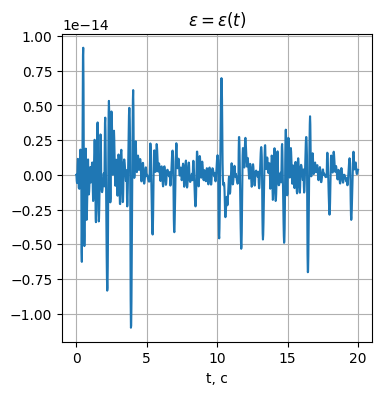

In [247]:
plt.plot(data.t, (C @ data.y).reshape(-1) - (C_m @ data_model.y).reshape(-1))
plt.grid()
plt.xlabel('t, c')
plt.title('$\epsilon = \epsilon(t)$')

plt.savefig(SAVE_PATH + '2_ideal_e.png')

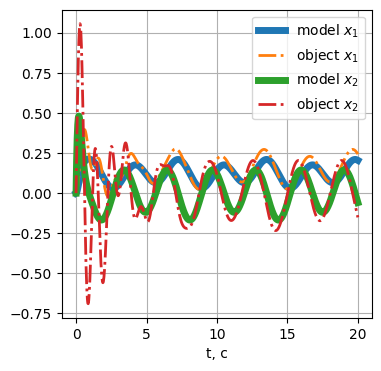

In [248]:
data = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(A, B, theta + 1, kappa, g))

plt.plot(data.t, data_model.y[0, :], linewidth=5, label='model $x_1$')
plt.plot(data.t, data.y[0, :], '-.', linewidth=2, label='object $x_1$')
plt.plot(data.t, data_model.y[1, :], linewidth=5, label='model $x_2$')
plt.plot(data.t, data.y[1, :], '-.', linewidth=2, label='object $x_2$')
plt.grid()
plt.legend()
plt.xlabel('t, c')


plt.savefig(SAVE_PATH + '2_not_ideal_1.1_x.png')

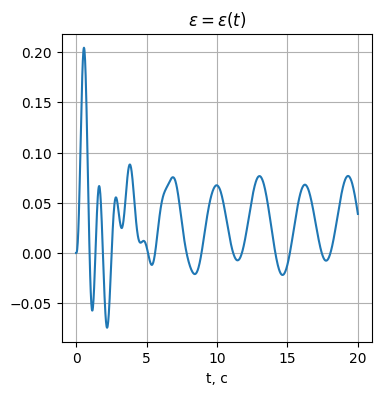

In [249]:
plt.plot(data.t, (C @ data.y).reshape(-1) - (C_m @ data_model.y).reshape(-1))
plt.grid()
plt.xlabel('t, c')
plt.title('$\epsilon = \epsilon(t)$')

plt.savefig(SAVE_PATH + '2_not_ideal_1.1_e.png')

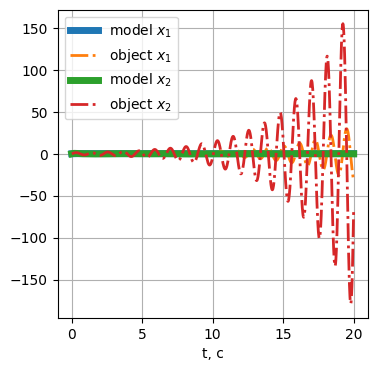

In [250]:
data = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(A, B, theta + 1.2, kappa, g))

plt.plot(data.t, data_model.y[0, :], linewidth=5, label='model $x_1$')
plt.plot(data.t, data.y[0, :], '-.', linewidth=2, label='object $x_1$')
plt.plot(data.t, data_model.y[1, :], linewidth=5, label='model $x_2$')
plt.plot(data.t, data.y[1, :], '-.', linewidth=2, label='object $x_2$')
plt.grid()
plt.legend()
plt.xlabel('t, c')

plt.savefig(SAVE_PATH + '2_bad_1.2_x.png')

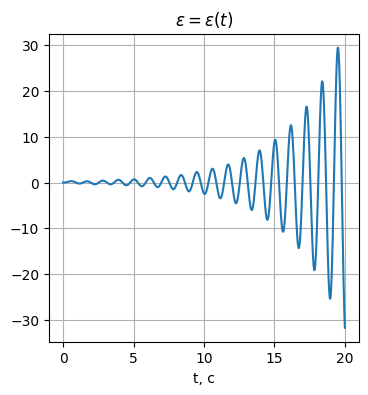

In [251]:
plt.plot(data.t, (C @ data.y).reshape(-1) - (C_m @ data_model.y).reshape(-1))
plt.grid()
plt.xlabel('t, c')
plt.title('$\epsilon = \epsilon(t)$')

plt.savefig(SAVE_PATH + '2_bad_1.2_e.png')